In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Load CSV data into a DataFrame
x_axis = "k"
df = pd.read_csv(f'../stats/imdb_benchmark_time.csv')
# df['algorithm'] = df['algorithm'].replace({'gmc': r'$GMC$', 'gne': r'$GNE$', "clt": r'$CLT$', "our": r'$DUST$', "our_base": r'$DUST_{c}$'})


In [4]:

# Define a list of color-blind-friendly line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', '^', 's', 'D']
colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

In [ ]:


# Create a dictionary to map algorithms to line styles and markers
algorithm_styles = {}
for i, algorithm in enumerate(df['algorithm'].unique()):
    algorithm_styles[algorithm] = {'line_style': line_styles[i % len(line_styles)],
                                   'marker': markers[i % len(markers)], 'color': colors[i % len(colors)]}
if x_axis == "s":
    x_axis = "|S|"
# Iterate over unique algorithms in the DataFrame and plot each one
for algorithm in df['algorithm'].unique():
    algorithm_data = df[df['algorithm'] == algorithm]
    style = algorithm_styles[algorithm]
    ax.plot(algorithm_data[x_axis], algorithm_data['time_taken_(s)'], label=algorithm, linestyle=style['line_style'], marker=style['marker'], color=style['color'])

if x_axis == "|S|":
    x_axis = "s"
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000) if x >= 1000 else '{:.1f}'.format(x)))
    ax.set_xlabel('Number of input unionable tuples (s)')
else:
    ax.set_xlabel('Number of output tuples (k)')

# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000) if x >= 1000 else '{:.1f}'.format(x)))
# Set labels and title

ax.set_ylabel('Runtime (seconds)')
# ax.set_title('Algorithm Performance Comparison')

# Display legend
#ax.legend()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df['algorithm'].unique()))
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt_name = f"diversity_{x_axis}_vs_time"
plt.savefig(f"div_plots/paper_plots/{plt_name}.pdf", format='pdf', bbox_inches='tight')
# Show the plot
#plt.show()


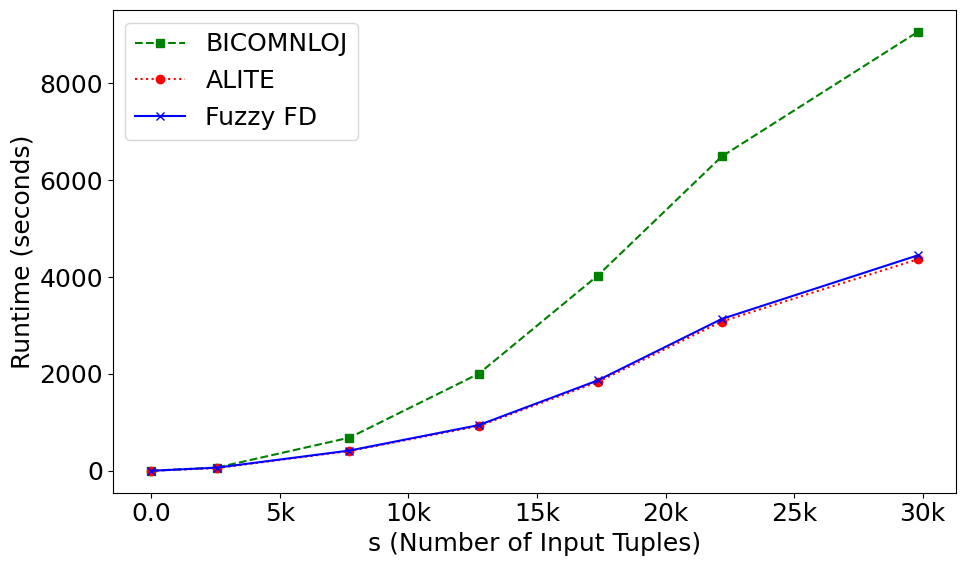

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load data from CSV file
csv_file = "../stats/imdb_benchmark_time.csv"  # Replace with your actual file path
imdb_time = pd.read_csv(csv_file)

# Formatter function to convert numbers to thousands (e.g., 1000 -> 1k)
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else str(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(imdb_time['S'], imdb_time['BICOMNLOJ'], marker='s', color='green', linestyle='--', label='BICOMNLOJ')
plt.plot(imdb_time['S'], imdb_time['ALITE'], marker='o', color='red', linestyle=':', label='ALITE')
plt.plot(imdb_time['S'], imdb_time['Fuzzy FD'], marker='x', color='blue', linestyle='-', label='Fuzzy FD')

# Adding labels and title
plt.xlabel('s (Number of Input Tuples)')
plt.ylabel('Runtime (seconds)')
# plt.title('Runtime Comparison ')
plt.legend()

# Applying the formatter to the X-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.rcParams.update({'font.size': 18})
plt.tight_layout()
# Save the plot as a PDF file
plt.savefig('runtime_comparison.pdf')

# Display the plot
plt.show()
